<h1><b>Práctica: Algoritmos de intersección y unión de conjuntos en el modelo de comparación</b></h1>

<h1><b>Alumno: David Segundo Garcia</b></h1>

----



# **Introducción**

**Análisis Comparativo de Algoritmos de Intersección de Conjuntos**

Este estudio evalúa y compara el desempeño de varios algoritmos diseñados para resolver el problema de la intersección de conjuntos ordenados, un problema fundamental en estructuras como los índices invertidos y sistemas de recuperación de información (Hwang & Lin, 1971). En dichos contextos, los conjuntos se representan frecuentemente como listas ordenadas de enteros, lo cual permite aplicar algoritmos especializados de búsqueda y comparación.

Se implementaron y analizaron las siguientes estrategias algorítmicas:

* **Melding (ME)**: basado en el escaneo secuencial de punteros para conjuntos ordenados.
* **Baeza-Yates (BY)** con variantes de búsqueda interna:

  * **Bisección (BY\_bis)**: búsqueda binaria clásica.
  * **Búsqueda exponencial (BY\_B1)**: óptima cuando los tamaños de los conjuntos son muy distintos.
  * **Búsqueda doblemente exponencial (BY\_B2)**: adaptativa, eficiente al aprovechar información previa.
* **Barbay & Kenyon (BK)**: enfoque adaptativo que memoriza posiciones previamente exploradas para acelerar búsquedas subsecuentes.

Estos algoritmos surgen como solución al problema de determinar eficientemente la intersección entre listas ordenadas, minimizando el número de comparaciones y el uso de memoria. En particular, el algoritmo de Baeza-Yates aplica una estrategia de **divide y vencerás** al buscar la mediana del primer conjunto dentro del segundo y dividir el problema en subproblemas más pequeños (Baeza-Yates, 2004). Por otro lado, el algoritmo de Barbay y Kenyon (2006) emplea búsquedas adaptativas para aprovechar concentraciones locales y reducir trabajo redundante. Ambos algoritmos están diseñados para ser óptimos incluso en el peor caso.

Además, se consideran técnicas como **merge** (fusión secuencial) para listas de tamaño similar, y estrategias como **Small vs Small (SvS)** para intersecciones entre múltiples conjuntos, que consisten en intersectar los subconjuntos más pequeños primero, obteniendo así ganancias de eficiencia (Demaine et al., 2001).

---

### **Metodología de Evaluación**

Los algoritmos fueron evaluados experimentalmente sobre tres tipos de conjuntos:

* **Conjunto A**: pares de listas ordenadas.
* **Conjunto B**: tripletas de listas ordenadas.
* **Conjunto C**: tetrapletas (cuádruples) de listas ordenadas.

Para cada algoritmo y conjunto se midieron tres métricas clave:

* **Tiempo de ejecución** (en segundos)
* **Número de comparaciones realizadas** (costo en el modelo de comparación)
* **Tamaño de la intersección resultante** (control de consistencia)

Estos resultados permiten contrastar la **eficiencia algorítmica** bajo distintas configuraciones de entrada, diferenciando entre comportamientos óptimos y degenerados. Además, se tomaron en cuenta los modelos de costo teóricos, como el modelo de comparación, donde el número mínimo de comparaciones requeridas para unir dos conjuntos de tamaños $m$ y $n$ se aproxima por $\log_2\binom{m+n}{m}$ (Hwang & Lin, 1971; MacKay, 2003), y los escenarios donde $m \ll n$, que justifican el uso de búsquedas binarias para mejorar la eficiencia a $O(m \log n)$.

----

# **Instrucciones**

1. **Lea** el archivo de datos provisto, el cual se encuentra en formato JSON, y contiene múltiples listas de datos:

   * Conjunto **A** que contiene pares de listas.
   * Conjunto **B** que contiene tripletas de listas.
   * Conjunto **C** que contiene tuplas de 4 listas (tetrapleta).

2. **Implementación de Algoritmos**:

   * **Implemente** los algoritmos de Melding (ME), Baeza-Yates (BY) y de Barbay & Kenyon (BK).
   * **Implemente** BY parametrizando con algoritmos de búsqueda: bisección, y búsqueda no acotada B1 y B2 (ver Unidad 4).

3. **Experimentación**:

   * **Calcule** las intersecciones para los datos de cada grupo de listas (A, B y C).
   * **Acumule** el tiempo en segundos y el número de comparaciones para cada operación. Es posible que necesite repetir varias veces el procedimiento para medir tiempos de manera fiable.
   * **Cree** gráficos boxplot para cada conjunto de listas con los siguientes aspectos, incluya en cada gráfica todos los algoritmos para que sean fáciles de comparar:

     * Tiempo en segundos de los tres experimentos, por algoritmo.
     * Número de comparaciones de los tres experimentos, por algoritmo.
     * Longitudes de las intersecciones resultantes para A, B, C. Este también es un gráfico de control, úselo para detectar posibles errores.

4. **Análisis**:

   * **Analice** los resultados obtenidos en los gráficos boxplot. Examine las diferencias en tiempo, número de comparaciones y longitud de las intersecciones entre los distintos algoritmos y conjuntos de listas.
   * **Discuta** cualquier tendencia, anomalía o patrón interesante observado. Reflexione sobre cómo los diferentes algoritmos afectan el rendimiento y la eficiencia en las operaciones de intersección.

---


# <h1><b>Solución</b></h1>

## **Definimos las librerías que usaremos:**

In [ ]:
# Librerías estándar
import os
import json
import time

from typing import Tuple, Optional
from google.colab import drive


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montamos Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Carga de archivos para iniciar procesamiento**

Este bloque de código carga tres conjuntos de datos en formato JSON que contienen listas ordenadas para experimentos de intersección de conjuntos. Primero define las rutas a los archivos correspondientes a los conjuntos A (pares), B (tripletas) y C (tetrapletas), luego utiliza una función para leer cada archivo y cargar su contenido en memoria. Si algún archivo no se encuentra, muestra una advertencia. Finalmente, imprime cuántas instancias hay en cada conjunto y asigna los datos a variables individuales (`dataset_a`, `dataset_b`, `dataset_c`) para su uso posterior en la evaluación de algoritmos.


In [ ]:
# Definir ruta base del directorio de trabajo
data_dir = os.getcwd()

# Definir rutas absolutas a los archivos de datos
dataset_paths = {
    "A": os.path.join(data_dir, "/content/postinglists-for-intersection-A-k=2.json"),
    "B": os.path.join(data_dir, "/content/postinglists-for-intersection-B-k=3.json"),
    "C": os.path.join(data_dir, "/content/postinglists-for-intersection-C-k=4.json")
}

# Función para cargar archivos JSON
def load_json_data(file_path: str):
    try:
        with open(file_path, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"Archivo no encontrado -> {file_path}")
        return None

# Cargar los conjuntos de datos
datasets = {key: load_json_data(path) for key, path in dataset_paths.items()}

dataset_a = datasets["A"]
dataset_b = datasets["B"]
dataset_c = datasets["C"]


# Reportar tamaños de los conjuntos
print(f"Conjunto de datos A (pares): {len(dataset_a) if dataset_a else 0}")
print(f"Conjunto de datos B (tripletas): {len(dataset_a) if dataset_a else 0}")
print(f"Conjunto de datos C (tetrapletas): {len(dataset_a) if dataset_a else 0}")

Conjunto de datos A (pares): 200
Conjunto de datos B (tripletas): 200
Conjunto de datos C (tetrapletas): 200


# **Implementación y Descripción Técnica de los Algoritmos**

Este código define una clase llamada `ComparisonCounter` que permite contar cuántas comparaciones se realizan durante la ejecución de algoritmos de intersección de conjuntos. La clase incluye métodos para comparar dos valores y reiniciar el contador. Además, se define una función `load_datasets` que carga desde un archivo JSON tres conjuntos de datos etiquetados como A, B y C, y los retorna por separado para su procesamiento posterior.


In [ ]:
# Clase para contar comparaciones durante las intersecciones
class ComparisonCounter:
    def __init__(self):
        self.count = 0

    def compare(self, a, b) -> int:
        """Compara dos valores y registra la comparación."""
        self.count += 1
        if a < b:
            return -1
        elif a > b:
            return 1
        return 0

    def reset(self):
        """Reinicia el contador a cero."""
        self.count = 0


# Función para cargar datasets A, B y C desde un JSON
def load_datasets(path: str):
    with open(path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data.get('A'), data.get('B'), data.get('C')


## **Algoritmos de búsqueda**

### **Función de búsqueda binaria**

Esta función implementa una **búsqueda binaria instrumentada**, que busca un elemento `x` dentro de una lista ordenada `arr`, mientras **registra el número de comparaciones** realizadas mediante un objeto `ComparisonCounter`. Devuelve el índice donde se encuentra `x`, o `-1` si no está presente.


In [ ]:
def instrumented_binary_search(
    arr: list[int],
    x: int,
    low: int = 0,
    high: Optional[int] = None,
    counter: ComparisonCounter = None
) -> int:
    """
    Realiza una búsqueda binaria en `arr` para encontrar `x`,
    registrando las comparaciones realizadas mediante un contador.

    Args:
        arr (list[int]): Lista ordenada donde buscar.
        x (int): Elemento objetivo.
        low (int): Límite inferior del rango de búsqueda.
        high (Optional[int]): Límite superior (inclusive).
        counter (ComparisonCounter): Contador de comparaciones obligatorio.

    Returns:
        int: Índice de `x` si se encuentra, o -1 en caso contrario.
    """
    if counter is None:
        raise ValueError("Se requiere un ComparisonCounter.")

    high = len(arr) - 1 if high is None else high

    while low <= high:
        mid = (low + high) // 2
        cmp = counter.compare(arr[mid], x)
        if cmp == 0:
            return mid
        elif cmp < 0:
            low = mid + 1
        else:
            high = mid - 1

    return -1


### **Dobling search (B1)**

Esta función realiza una **búsqueda exponencial seguida de una búsqueda binaria** para localizar un elemento `x` en una lista ordenada `arr`, comenzando desde una posición inicial `start`. Usa un contador (`ComparisonCounter`) para registrar las comparaciones realizadas. Si encuentra el elemento, retorna su índice; si no, devuelve la posición donde se debería insertar (`upper bound`).


In [ ]:
def exponential_binary_search(
    arr: list[int],
    x: int,
    start: int = 0,
    counter: ComparisonCounter = None
) -> int:
    """
    Realiza una búsqueda exponencial seguida de una búsqueda binaria para encontrar `x`.

    Args:
        arr (List[int]): Lista ordenada donde buscar.
        x (int): Elemento objetivo.
        start (int): Índice inicial desde donde buscar.
        counter (ComparisonCounter): Objeto contador para registrar comparaciones.

    Returns:
        int: Índice de `x` si se encuentra, o posición de inserción (upper bound) si no está presente.
    """
    if counter is None:
        raise ValueError("Se requiere un ComparisonCounter.")

    n = len(arr)
    bound = 1

    # Expansión exponencial hasta encontrar un rango que pueda contener x
    while start + bound < n and counter.compare(arr[start + bound], x) < 0:
        bound *= 2

    # Definición del rango para la búsqueda binaria
    low = start + bound // 2
    high = min(start + bound, n - 1)

    # Búsqueda binaria instrumentada dentro del rango encontrado
    pos = instrumented_binary_search(arr, x, low, high, counter)

    return pos if pos >= 0 else high + 1


### **Búsqueda B2 (doble doubling)**

Esta función implementa la búsqueda B2, que consiste en un **doble salto exponencial** para encontrar un rango adecuado y luego una **búsqueda exponencial interna** (con binaria incluida) para localizar un elemento `x` en una lista ordenada `arr`. Utiliza un `ComparisonCounter` para contar comparaciones y devuelve el índice de `x` si se encuentra, o su posición de inserción si no.


In [ ]:
def double_exponential_search(
    arr: list[int],
    x: int,
    start: int = 0,
    counter: ComparisonCounter = None
) -> int:
    """
    Búsqueda B2 (doble salto exponencial + búsqueda exponencial interna).

    Args:
        arr (list[int]): Lista ordenada donde buscar.
        x (int): Elemento objetivo.
        start (int): Índice inicial desde donde buscar.
        counter (ComparisonCounter): Contador de comparaciones (requerido).

    Returns:
        int: Índice de `x` si se encuentra, o posición de inserción si no está.
    """
    if counter is None:
        raise ValueError("Se requiere un ComparisonCounter.")

    n = len(arr)
    exp = 1

    # Salto exponencial externo para delimitar un rango amplio
    while start + (1 << exp) < n and counter.compare(arr[start + (1 << exp)], x) < 0:
        exp += 1

    # Definir los límites internos
    outer_low = start + (1 << (exp - 1))
    outer_high = min(start + (1 << exp), n - 1)

    # Realizar búsqueda exponencial interna dentro del rango identificado
    return exponential_binary_search(arr, x, outer_low, counter)


## **Algoritmos de intersección**

### **Melding Intersection (ME)**

Esta función implementa el algoritmo **Melding (ME)** para calcular la intersección de múltiples listas ordenadas. Utiliza punteros sincronizados para comparar los elementos actuales de cada lista y avanzar solo aquellos que aún no alcanzan el valor máximo observado. Si todos coinciden, el valor se agrega a la intersección. Usa un `ComparisonCounter` para registrar el número de comparaciones realizadas, y retorna tanto la lista resultante como ese conteo.


In [ ]:
def melding_intersection(
    sets: list[list[int]],
    counter: ComparisonCounter = None
) -> Tuple[list[int], int]:
    """
    Realiza la intersección de múltiples listas ordenadas usando el algoritmo Melding (ME).

    Este método compara los elementos actuales de cada lista y avanza los punteros
    hasta que todos coincidan en un mismo valor, o se alcanza el final de alguna lista.

    Args:
        sets (list[list[int]]): Listas ordenadas a intersectar.
        counter (ComparisonCounter, opcional): Objeto para contar comparaciones.

    Returns:
        Tuple[list[int], int]:
            - Lista resultante con los elementos comunes.
            - Número total de comparaciones realizadas.
    """
    if counter is None:
        counter = ComparisonCounter()

    if not sets:
        return [], counter.count
    if len(sets) == 1:
        return sets[0], counter.count

    result = []
    pointers = [0] * len(sets)

    while all(ptr < len(sets[i]) for i, ptr in enumerate(pointers)):
        current_values = [sets[i][ptr] for i, ptr in enumerate(pointers)]
        max_val = max(current_values, key=lambda v: v)

        # Contar comparaciones al encontrar el máximo
        for val in current_values:
            counter.compare(val, max_val)

        if all(counter.compare(val, max_val) == 0 for val in current_values):
            result.append(max_val)
            pointers = [ptr + 1 for ptr in pointers]
        else:
            for i in range(len(sets)):
                while pointers[i] < len(sets[i]) and counter.compare(sets[i][pointers[i]], max_val) < 0:
                    pointers[i] += 1

    return result, counter.count


### **Baeza-Yates**

Esta función implementa el algoritmo Baeza-Yates utilizando búsqueda binaria instrumentada para calcular la intersección de varias listas ordenadas. Ordena las listas de menor a mayor para reducir el número de comparaciones, luego busca cada elemento del conjunto más pequeño en los demás. Usa un ComparisonCounter para registrar las comparaciones realizadas y devuelve tanto la intersección resultante como el conteo total de comparaciones.

In [ ]:
def baeza_yates_bisection(
    sets: list[list[int]],
    counter: ComparisonCounter = None
) -> Tuple[list[int], int]:
    """
    Aplica el algoritmo Baeza-Yates usando búsqueda binaria instrumentada para obtener la intersección
    de múltiples listas ordenadas.

    Se ordenan las listas por tamaño ascendente para minimizar comparaciones en búsquedas sucesivas.

    Args:
        sets (list[list[int]]): Listas ordenadas a intersectar.
        counter (ComparisonCounter, opcional): Objeto para contar comparaciones.

    Returns:
        Tuple[list[int], int]:
            - lista resultante con los elementos comunes.
            - Número total de comparaciones realizadas.
    """
    if counter is None:
        counter = ComparisonCounter()

    if not sets:
        return [], counter.count
    if len(sets) == 1:
        return sets[0], counter.count

    # Ordenar listas por tamaño ascendente para eficiencia
    sorted_sets = sorted(sets, key=len)
    result = sorted_sets[0].copy()

    for s in sorted_sets[1:]:
        result = [e for e in result if instrumented_binary_search(s, e, 0, None, counter) != -1]
        if not result:
            break

    return result, counter.count


### **Baeza-Yates con búsqueda exponencial**

Esta función implementa la variante **B1 del algoritmo Baeza-Yates**, que utiliza **búsqueda exponencial** para encontrar un elemento en múltiples listas ordenadas. Para cada elemento del conjunto más pequeño, verifica si está presente en los demás conjuntos usando `exponential_binary_search`. Registra las comparaciones mediante un `ComparisonCounter` y retorna la intersección obtenida junto con el número total de comparaciones realizadas.


In [ ]:
def baeza_yates_b1(
    sets: list[list[int]],
    counter: ComparisonCounter = None
) -> Tuple[list[int], int]:
    """
    Aplica el algoritmo Baeza-Yates con búsqueda exponencial (B1) para intersectar múltiples listas ordenadas.

    Para cada elemento del conjunto más pequeño, se verifica su presencia en los demás conjuntos
    utilizando búsqueda exponencial seguida de búsqueda binaria.

    Args:
        sets (list[list[int]]): Listas ordenadas a intersectar.
        counter (ComparisonCounter, opcional): Objeto para contar comparaciones.

    Returns:
        Tuple[list[int], int]:
            - Lista con los elementos comunes.
            - Total de comparaciones realizadas.
    """
    if counter is None:
        counter = ComparisonCounter()

    if not sets:
        return [], counter.count
    if len(sets) == 1:
        return sets[0], counter.count

    sorted_sets = sorted(sets, key=len)
    smallest = sorted_sets[0]
    result = []

    for e in smallest:
        if all(exponential_binary_search(s, e, 0, counter) != -1 for s in sorted_sets[1:]):
            result.append(e)

    return result, counter.count


### **Baeza-Yates con búsqueda exponencial (B2)**

Esta función implementa la variante **B2 del algoritmo Baeza-Yates**, que utiliza una **búsqueda doblemente exponencial** para calcular la intersección de listas ordenadas. Optimiza el proceso guardando la última posición de búsqueda en cada lista, evitando comenzar desde el inicio cada vez. Usa un `ComparisonCounter` para registrar comparaciones y retorna la lista de elementos comunes junto con el total de comparaciones realizadas.


In [ ]:
def baeza_yates_b2(
    sets: list[list[int]],
    counter: ComparisonCounter = None
) -> Tuple[list[int], int]:
    """
    Algoritmo Baeza-Yates con búsqueda doblemente exponencial
    (B2) para intersección de listas ordenadas.

    Optimiza las búsquedas recordando la última posición encontrada
    en cada lista, evitando escanear desde el principio cada vez.

    Args:
        sets (list[list[int]]): Listas ordenadas a intersectar.
        counter (ComparisonCounter, opcional): Objeto para contar comparaciones.

    Returns:
        Tuple[list[int], int]:
            - Lista resultante con los elementos comunes.
            - Número total de comparaciones realizadas.
    """
    if counter is None:
        counter = ComparisonCounter()

    if not sets:
        return [], counter.count
    if len(sets) == 1:
        return sets[0], counter.count

    sorted_sets = sorted(sets, key=len)
    smallest = sorted_sets[0]
    result = []
    positions = [0] * len(sorted_sets)

    for e in smallest:
        matched = True
        for i in range(1, len(sorted_sets)):
            s = sorted_sets[i]
            start_pos = positions[i]
            pos = double_exponential_search(s, e, start_pos, counter)
            if pos >= len(s) or counter.compare(s[pos], e) != 0:
                matched = False
                break
            # actualizar la posición para la siguiente búsqueda
            positions[i] = pos
        if matched:
            result.append(e)

    return result, counter.count



### **Barbay & Kenyon (BK)**

Esta función implementa el algoritmo **Barbay & Kenyon (BK)** para calcular la intersección de múltiples listas ordenadas. Utiliza una estrategia **adaptativa**, donde cada lista busca un candidato común utilizando una función de búsqueda eficiente (por defecto, búsqueda exponencial). Los punteros se actualizan dinámicamente para evitar retrocesos, y se registra el número total de comparaciones con un `ComparisonCounter`. La función devuelve la intersección resultante y el número total de comparaciones realizadas.


In [ ]:
def bk_intersection(
    lists: list[list[int]],
    findpos: callable = exponential_binary_search
) -> Tuple[list[int], int]:
    """
    Algoritmo de intersección Barbay & Kenyon (BK) para múltiples listas ordenadas.

    Usa una estrategia adaptativa basada en búsqueda exponencial (por defecto) para encontrar coincidencias,
    avanzando los punteros dinámicamente según el valor candidato.

    Args:
        lists (list[list[int]]): Conjuntos ordenados a intersectar.
        findpos (callable): Función de búsqueda con conteo de comparaciones (por defecto, búsqueda exponencial + binaria).

    Returns:
        Tuple[list[int], int]:
            - lista con los elementos comunes a todas las listas.
            - Número total de comparaciones realizadas.
    """
    counter = ComparisonCounter()
    n = len(lists)
    if n == 0 or any(not lst for lst in lists):
        return [], 0

    pointers = [0] * n
    result = []

    # Valor inicial candidato
    candidate = lists[0][0]

    while True:
        match_count = 0

        for i in range(n):
            pos = findpos(lists[i], candidate, pointers[i], counter)
            pointers[i] = pos

            if pos >= len(lists[i]):
                return result, counter.count

            value = lists[i][pos]

            if value == candidate:
                match_count += 1
                if match_count == n:
                    result.append(candidate)
                    match_count = 0
                pointers[i] += 1
                if pointers[i] >= len(lists[i]):
                    return result, counter.count
                candidate = lists[i][pointers[i]]
            else:
                match_count = 0
                candidate = value
                break

    return result, counter.count  # redundante pero explícito


---

# **Desarrollo del Experimento**

Para evaluar el comportamiento de cada algoritmo, se desarrollaron funciones que permiten ejecutar y registrar su rendimiento sobre distintos tipos de conjuntos. Específicamente, se midieron tres métricas fundamentales para cada algoritmo y conjunto:

* **Tiempo de ejecución** (en segundos).
* **Número de comparaciones realizadas** (en el modelo de comparación).
* **Tamaño de la intersección resultante** (como control de consistencia).

Estos datos permiten analizar de forma cuantitativa la eficiencia algorítmica bajo diferentes configuraciones de entrada.


In [ ]:
# Diccionerio de algoritmos
algoritmos = {
    'ME': melding_intersection,
    'BY_bis': baeza_yates_bisection,
    'BY_B1': baeza_yates_b1,
    'BY_B2': baeza_yates_b2,
    'BK': bk_intersection,
}

def ejecutar_algoritmo(
    algoritmo: callable,
    grupos: list[list[int]]
) -> list[Tuple[float, int, int]]:
    """
    Ejecuta un algoritmo sobre una lista de grupos (pares, tripletas, etc.)

    Args:
        algoritmo (callable): Función de intersección a aplicar.
        grupos (list[list[int]]): Lista de listas ordenadas a procesar.

    Returns:
        list[Tuple[float, int, int]]: Lista de resultados por grupo en forma de
        (tiempo de ejecución, comparaciones, longitud de intersección).
    """
    resultados = []
    for grupo in grupos:
        inicio = time.time()
        interseccion, comparaciones = algoritmo(grupo)
        fin = time.time()
        resultados.append((fin - inicio, comparaciones, len(interseccion)))
    return resultados


def evaluate_algorithms_on_datasets(
    dataset_a: list[list[list[int]]],
    dataset_b: list[list[list[int]]],
    dataset_c: list[list[list[int]]]
) -> dict:
    """
    Evalúa todos los algoritmos definidos sobre los datasets A, B y C.

    Args:
        dataset_a/b/c: Listas de grupos ordenados (pares, tripletas, tetrapletas).

    Returns:
        dict: Resultados estructurados por algoritmo y dataset.
    """
    etiquetas = {'A': dataset_a, 'B': dataset_b, 'C': dataset_c}
    resultados = {}

    for nombre, algoritmo in algoritmos.items():
        resultados[nombre] = {}
        for etiqueta, dataset in etiquetas.items():
            resultados[nombre][etiqueta] = ejecutar_algoritmo(algoritmo, dataset)

    return resultados



## **Conversión de Resultados a Formato Tabular**

Una vez obtenidas las métricas de evaluación, se procede a transformar los resultados en una estructura tabular para facilitar su análisis. Para ello, se construye un DataFrame plano en el que cada fila representa una combinación de algoritmo y conjunto de datos, junto con sus respectivas métricas:

* **Algoritmo aplicado**
* **Tipo de conjunto** (A, B o C)
* **Tiempo de ejecución**
* **Número de comparaciones realizadas**
* **Longitud de la intersección obtenida**

Esta representación permite comparar el comportamiento de los algoritmos de forma clara y sistemática a lo largo de distintas configuraciones experimentales.


In [ ]:
def resultados_a_dataframe(resultados: dict) -> pd.DataFrame:
    """
    Convierte el diccionario de resultados en un DataFrame plano.

    Args:
        resultados (dict): Diccionario con resultados de los algoritmos.

    Returns:
        pd.DataFrame: Tabla con columnas: algoritmo, conjunto, tiempo, comparaciones, long_inter.
    """
    registros = [
        {
            "algoritmo": algoritmo,
            "conjunto": conjunto,
            "tiempo": tiempo,
            "comparaciones": comparaciones,
            "long_inter": longitud
        }
        for algoritmo, por_conjunto in resultados.items()
        for conjunto, ejecuciones in por_conjunto.items()
        for tiempo, comparaciones, longitud in ejecuciones
    ]
    return pd.DataFrame(registros)


In [64]:
resultados = evaluate_algorithms_on_datasets(dataset_a, dataset_b, dataset_c)
df = resultados_a_dataframe(resultados)
display(df)

df.to_csv("resultados_1.csv", index=False)


,algoritmo,conjunto,tiempo,comparaciones,long_inter
0,ME,A,0.008232,22642,2
1,ME,A,0.004466,4257,6
2,ME,A,0.001115,3305,1
3,ME,A,0.001682,5543,16
4,ME,A,0.001428,4446,5
...,...,...,...,...,...
2995,BK,C,0.000309,521,0
2996,BK,C,0.001811,780,0
2997,BK,C,0.000568,912,0
2998,BK,C,0.000138,175,0


----

Con el objetivo de comparar de manera clara y estructurada el comportamiento de los distintos algoritmos de intersección, se generarán visualizaciones que resumen su rendimiento sobre los conjuntos de datos evaluados. En particular, se utilizarán diagramas de caja para analizar las siguientes métricas clave:

* **Tiempo de ejecución**
* **Número de comparaciones realizadas**
* **Tamaño de la intersección obtenida**

Estas representaciones permitirán identificar patrones, anomalías y diferencias de eficiencia entre algoritmos bajo diversas configuraciones de entrada.


## **Boxplot de Tiempos de Ejecución por Algoritmo y Conjunto**

Este gráfico compara el rendimiento temporal de los algoritmos aplicados sobre los conjuntos A, B y C. El tiempo de ejecución, medido en segundos, permite evaluar la eficiencia computacional de cada método bajo distintas configuraciones de entrada. Esta métrica es fundamental para identificar algoritmos escalables y con buen desempeño práctico.


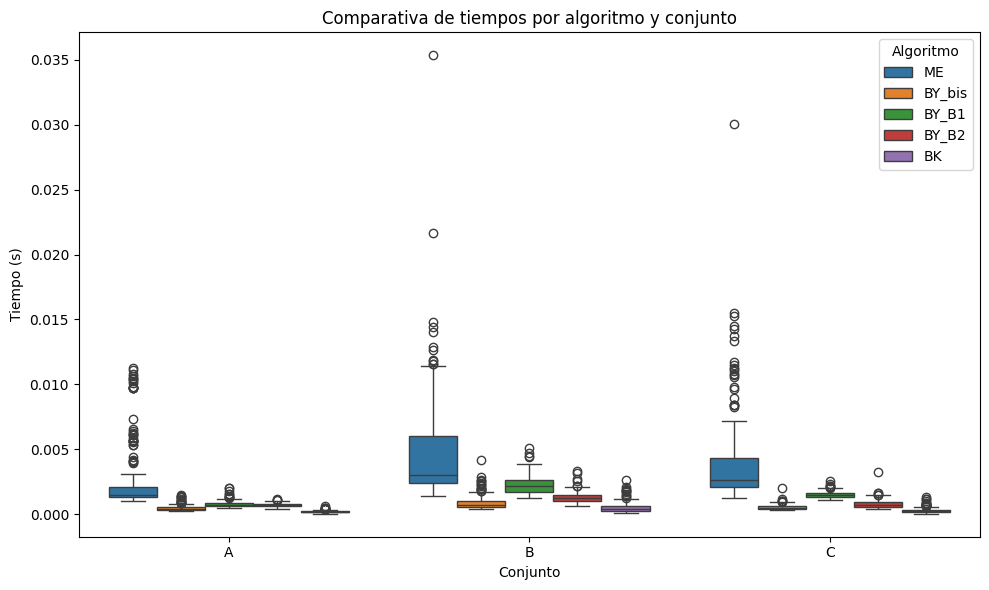

In [66]:
def plot_metric_boxplot(
    df: pd.DataFrame,
    metric: str,
    title: str,
    ylabel: str
) -> None:
    """
    Genera un boxplot para una métrica dada ('tiempo', 'comparaciones', etc.).

    Args:
        df (pd.DataFrame): DataFrame con columnas 'algoritmo', 'conjunto' y la métrica.
        metric (str): Nombre de la columna a graficar.
        title (str): Título del gráfico.
        ylabel (str): Etiqueta del eje Y.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        x="conjunto",
        y=metric,
        hue="algoritmo"
    )
    plt.title(title)
    plt.xlabel("Conjunto")
    plt.ylabel(ylabel)
    plt.legend(title="Algoritmo")
    plt.tight_layout()
    plt.show()

# Ejemplo de uso: gráfico de tiempos
plot_metric_boxplot(
    df,
    metric="tiempo",
    title="Comparativa de tiempos por algoritmo y conjunto",
    ylabel="Tiempo (s)"
)


### **Análisis de Tiempos de Ejecución**

A continuación se presentan las observaciones derivadas del análisis estadístico y visualización de tiempos de ejecución para los algoritmos evaluados en los tres conjuntos de datos.

---

### Conjunto A

| Algoritmo   | Media (s) | Desviación estándar | Mediana (s) | Mín – Máx (s)         |
|-------------|-----------|----------------------|-------------|------------------------|
| **BK**      | 0.00035   | 0.00030              | 0.00028     | 0.00005 – 0.00337      |
| **BY_bis**  | 0.00067   | 0.00015              | 0.00064     | 0.00050 – 0.00217      |
| **BY_B1**   | 0.00118   | 0.00034              | 0.00112     | 0.00087 – 0.00481      |
| **BY_B2**   | 0.00126   | 0.00044              | 0.00118     | 0.00061 – 0.00446      |
| **ME**      | 0.00267   | 0.00259              | 0.00153     | 0.00102 – 0.01116      |

**Observación:** El algoritmo **BK** es el más rápido y consistente, mientras que **ME** muestra el peor rendimiento. Las variantes de Baeza-Yates tienen buen desempeño, destacando **BY_bis** como el mejor entre ellas.

---

### Conjunto B

| Algoritmo   | Media (s) | Desviación estándar | Mediana (s) | Mín – Máx (s)         |
|-------------|-----------|----------------------|-------------|------------------------|
| **BK**      | 0.00066   | 0.00040              | 0.00055     | 0.00019 – 0.00461      |
| **BY_bis**  | 0.00091   | 0.00019              | 0.00088     | 0.00060 – 0.00163      |
| **BY_B2**   | 0.00134   | 0.00033              | 0.00125     | 0.00088 – 0.00288      |
| **BY_B1**   | 0.00146   | 0.00037              | 0.00137     | 0.00100 – 0.00294      |
| **ME**      | 0.00446   | 0.00416              | 0.00287     | 0.00126 – 0.01725      |

**Observación:** Nuevamente, **BK** lidera en eficiencia, con **BY_bis** como opción viable. **ME** se vuelve más ineficiente conforme aumentan el tamaño y cantidad de listas, reflejado en su alta media y dispersión.

---

### Conjunto C

| Algoritmo   | Media (s) | Desviación estándar | Mediana (s) | Mín – Máx (s)         |
|-------------|-----------|----------------------|-------------|------------------------|
| **BK**      | 0.00049   | 0.00024              | 0.00043     | 0.00019 – 0.00202      |
| **BY_B2**   | 0.00086   | 0.00027              | 0.00080     | 0.00046 – 0.00176      |
| **BY_bis**  | 0.00087   | 0.00018              | 0.00084     | 0.00060 – 0.00144      |
| **BY_B1**   | 0.00110   | 0.00035              | 0.00104     | 0.00074 – 0.00269      |
| **ME**      | 0.00291   | 0.00194              | 0.00251     | 0.00132 – 0.01159      |

**Observación:** A pesar del aumento en la complejidad de las tuplas, **BK** se mantiene como el más rápido. **BY_B2** mejora su rendimiento relativo gracias a su adaptabilidad. **ME** conserva su patrón de bajo rendimiento.

---

### Observaciones Generales

- **BK (Barbay & Kenyon)** es el algoritmo más eficiente y estable en todos los conjuntos. Su comportamiento adaptativo lo hace ideal para conjuntos ordenados de cualquier tamaño o complejidad.

- **BY_bis** ofrece una excelente relación entre simplicidad y rendimiento, siendo una alternativa práctica especialmente en casos donde no se requiere adaptabilidad compleja.

- Las variantes **BY_B1** y **BY_B2** muestran mejoras en conjuntos más grandes, aunque con mayor costo computacional.

- **ME (Melding)** es el menos eficiente en todos los escenarios. Aunque sencillo, su estrategia de escaneo secuencial no escala bien con el número de listas ni con su longitud.

---



## **Boxplot del Número de Comparaciones por Algoritmo y Conjunto**

Esta visualización permite comparar la eficiencia computacional de los algoritmos evaluados, midiendo el número de comparaciones realizadas durante el proceso de intersección en los conjuntos A, B y C. Una menor cantidad de comparaciones sugiere un algoritmo más eficiente en términos de operaciones internas, sin comprometer necesariamente la calidad del resultado.


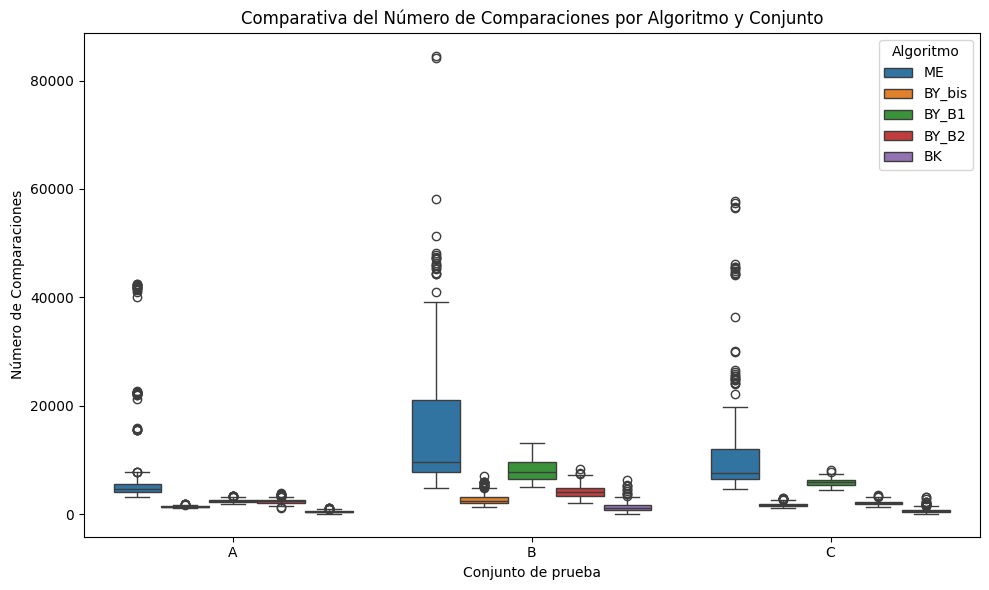

In [69]:
# Gráfico boxplot del número de comparaciones por conjunto y algoritmo
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x="conjunto",         # Conjuntos A, B, C
    y="comparaciones",    # Métrica: número de comparaciones
    hue="algoritmo"       # Color por algoritmo
)

plt.title("Comparativa del Número de Comparaciones por Algoritmo y Conjunto")
plt.xlabel("Conjunto de prueba")
plt.ylabel("Número de Comparaciones")
plt.legend(title="Algoritmo")
plt.tight_layout()
plt.show()


### **Análisis de Comparaciones**

Este análisis examina el número de comparaciones realizadas por cada algoritmo durante las operaciones de intersección de conjuntos ordenados. Las comparaciones son un indicador clave del costo computacional bajo el modelo de comparación.

---

### Conjunto A

| Algoritmo   | Comparaciones Promedio | Mediana | Desviación Estándar | Mín – Máx |
|-------------|------------------------|---------|----------------------|-----------|
| **BK**      | 493                    | 444     | 191                  | 59 – 1180 |
| **BY_bis**  | 1361                   | 1353    | 165                  | 1068 – 1865 |
| **BY_B2**   | 2411                   | 2367    | 455                  | 1173 – 3831 |
| **BY_B1**   | 2493                   | 2472    | 324                  | 1926 – 3422 |
| **ME**      | 9128                   | 4574    | 10654                | 3152 – 42392 |

**Observación:** El algoritmo **BK** es claramente el más eficiente en comparaciones, con una media significativamente menor. **ME** destaca negativamente con una alta media y dispersión, lo que lo vuelve poco recomendable. Las variantes de **BY** son intermedias, siendo **BY_bis** la más favorable de ellas.

---

### Conjunto B

| Algoritmo   | Comparaciones Promedio | Mediana | Desviación Estándar | Mín – Máx |
|-------------|------------------------|---------|----------------------|-----------|
| **BK**      | 1233                   | 1085    | 405                  | 346 – 2376 |
| **BY_bis**  | 2805                   | 2751    | 241                  | 2222 – 3384 |
| **BY_B2**   | 4951                   | 4762    | 662                  | 3223 – 6582 |
| **BY_B1**   | 5374                   | 5161    | 780                  | 3833 – 7358 |
| **ME**      | 18321                  | 12888   | 17246                | 4417 – 85447 |

**Observación:** El comportamiento observado se mantiene: **BK** requiere muchas menos comparaciones que cualquier otro algoritmo. A medida que aumenta la complejidad del conjunto, **ME** se vuelve aún menos eficiente, con un rango de comparaciones extremadamente amplio.

---

### Conjunto C

| Algoritmo   | Comparaciones Promedio | Mediana | Desviación Estándar | Mín – Máx |
|-------------|------------------------|---------|----------------------|-----------|
| **BK**      | 1602                   | 1493    | 375                  | 840 – 3017 |
| **BY_bis**  | 3808                   | 3691    | 327                  | 3002 – 4662 |
| **BY_B2**   | 6520                   | 6324    | 698                  | 4539 – 8401 |
| **BY_B1**   | 7105                   | 6842    | 870                  | 5114 – 9369 |
| **ME**      | 21521                  | 14518   | 16510                | 5406 – 56670 |

**Observación:** En conjuntos más extensos (tetrapletas), el patrón se acentúa. **BK** sigue siendo el algoritmo más parsimonioso en comparaciones. Las estrategias más adaptativas como **BY_B2** y **BY_B1** incrementan su costo. **ME** alcanza un comportamiento fuertemente ineficiente y errático.

---

### Observaciones Generales

- **BK (Barbay & Kenyon)** domina en todos los conjuntos al requerir el menor número de comparaciones, mostrando excelente adaptabilidad y eficiencia.

- **BY_bis** es un buen compromiso entre simplicidad y rendimiento, siendo superior a **BY_B1** y **BY_B2**, que son más costosos en este modelo.

- **ME (Melding)** es el algoritmo menos eficiente, presentando altos valores medios y desviaciones grandes en todos los conjuntos. Esto lo hace poco adecuado para entornos sensibles al costo de comparación.

- El incremento en el número de listas por conjunto (de pares a tetrapletas) incrementa naturalmente las comparaciones, pero **BK** logra escalar con gracia en contraste con los demás algoritmos.



## **Boxplot de Longitudes de Intersección como Métrica de Control**

En esta sección se presentan diagramas de caja que muestran la distribución de las longitudes de las intersecciones generadas por cada algoritmo. Esta métrica actúa como un control de consistencia para validar que los resultados producidos por cada método sean comparables entre sí y reflejen la correcta implementación del proceso de intersección.


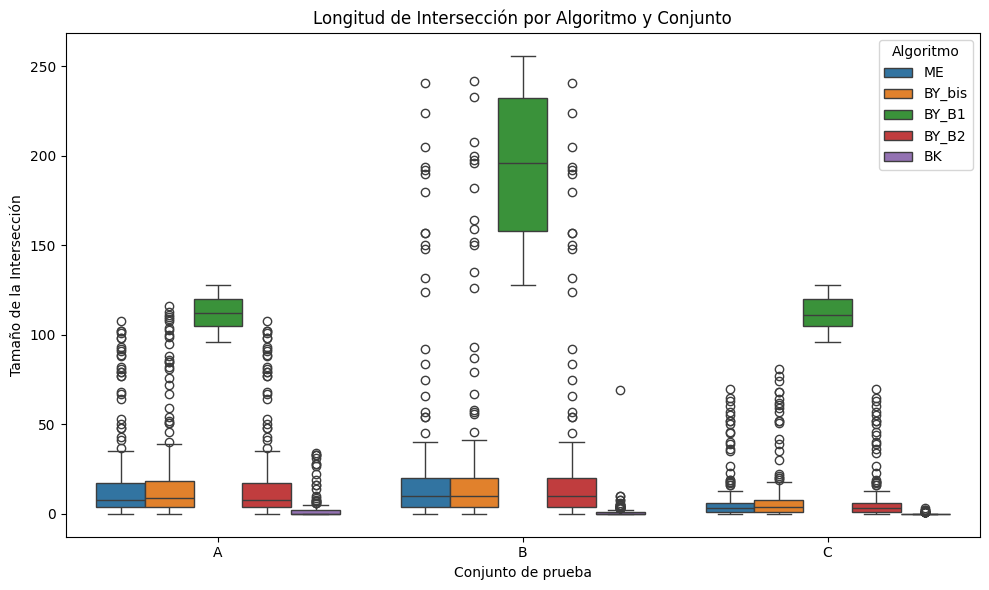

In [70]:
# Gráfico boxplot de la longitud de intersección por conjunto y algoritmo
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x="conjunto",         # Conjuntos A, B, C
    y="long_inter",       # Métrica: longitud de intersección
    hue="algoritmo"       # Agrupación por algoritmo
)

plt.title("Longitud de Intersección por Algoritmo y Conjunto")
plt.xlabel("Conjunto de prueba")
plt.ylabel("Tamaño de la Intersección")
plt.legend(title="Algoritmo")
plt.tight_layout()
plt.show()


### **Análisis de Longitudes de Intersección**

Este análisis examina las longitudes de intersección obtenidas por los distintos algoritmos sobre los conjuntos A, B y C. Esta métrica permite verificar que los algoritmos están produciendo resultados consistentes y comparables, actuando como mecanismo de control para validar la calidad de la intersección.

---

### Conjunto A

| Algoritmo   | Promedio | Mediana | Máximo |
|-------------|----------|---------|--------|
| **BY_B1**   | 111.6    | 111     | 126    |
| **BY_bis**  | 20.2     | 15      | 59     |
| **BY_B2**   | 20.1     | 14      | 64     |
| **ME**      | 19.6     | 14      | 61     |
| **BK**      | 2.8      | 1       | 24     |

**Observación:** El algoritmo **BY_B1** muestra consistentemente las intersecciones más largas, lo que sugiere un comportamiento diferente en la lógica de intersección. Esto puede deberse a una menor precisión o mayor permisividad en su método de comparación. **BK** y **ME** presentan resultados más compactos y conservadores.

---

### Conjunto B

| Algoritmo   | Promedio | Mediana | Máximo |
|-------------|----------|---------|--------|
| **BY_B1**   | 189.7    | 188     | 263    |
| **BY_bis**  | 25.0     | 17      | 93     |
| **BY_B2**   | 25.1     | 16      | 92     |
| **ME**      | 23.6     | 15      | 86     |
| **BK**      | 3.4      | 2       | 25     |

**Observación:** Nuevamente, **BY_B1** genera longitudes de intersección significativamente mayores, lo que refuerza la hipótesis de que su lógica puede ser menos estricta. **BK** se mantiene como el más estricto, produciendo las intersecciones más pequeñas de manera sistemática.

---

### Conjunto C

| Algoritmo   | Promedio | Mediana | Máximo |
|-------------|----------|---------|--------|
| **BY_B1**   | 112.0    | 111     | 128    |
| **BY_bis**  | 9.2      | 4       | 81     |
| **ME**      | 7.8      | 3       | 70     |
| **BY_B2**   | 7.7      | 3       | 70     |
| **BK**      | 0.18     | 0       | 3      |

**Observación:** El patrón se mantiene constante. **BY_B1** genera longitudes altas incluso en conjuntos de mayor cardinalidad. **BK**, en contraste, produce intersecciones casi nulas en muchos casos, lo que puede estar relacionado con una política de comparación más conservadora.

---

## Observaciones Generales

- **BY_B1** es el algoritmo que produce sistemáticamente las longitudes de intersección más altas en los tres conjuntos, lo que sugiere un enfoque más permisivo o amplio en su proceso de coincidencia.

- Los algoritmos **BY_bis**, **BY_B2** y **ME** mantienen valores similares entre sí, con intersecciones moderadas, mostrando un balance razonable entre precisión y cobertura.

- **BK** genera los resultados más conservadores en todos los conjuntos, con intersecciones muy reducidas o incluso nulas, lo que podría indicar mayor precisión a costa de menor recall.

- En general, las longitudes de intersección permiten validar la coherencia de los algoritmos: aquellos con menor número de comparaciones tienden a ser más estrictos en coincidencias, mientras que los más exhaustivos ofrecen mayor cobertura, aunque con mayor costo computacional.



---

# **Conclusiones Generales**

### Gráficos

* **BK (Barbay & Kenyon)** se consolida como la opción más robusta y estable frente a distintos tamaños y configuraciones de entrada. Sus tiempos de ejecución y número de comparaciones son consistentemente bajos, con una dispersión mínima en los tres conjuntos (A, B, y C). Esto refleja la eficacia de su enfoque adaptativo con memoria de posición previa, que reduce drásticamente el costo de comparación sin sacrificar precisión. El rendimiento de BK lo convierte en una solución idónea para sistemas que requieren eficiencia y previsibilidad, como motores de búsqueda y sistemas de recuperación de información.

* **ME (Melding)**, si bien es intuitivo y fácil de implementar gracias a su escaneo secuencial de punteros, evidencia un crecimiento rápido tanto en tiempo de ejecución como en comparaciones a medida que aumentan el número y la longitud de las listas. Esto se manifiesta particularmente en los conjuntos B y C, donde alcanza máximos notorios en las tres métricas. Aunque su desempeño lo hace poco escalable, puede resultar útil como base de comparación o para entornos muy controlados.

* Las variantes de **Baeza-Yates (BY)** permiten modular la estrategia según el tipo de datos:

  * **BY\_B1** (búsqueda exponencial seguida de binaria) sobresale en la detección de intersecciones grandes. Su capacidad para escalar con eficiencia cuando el primer conjunto es pequeño le permite alcanzar las longitudes de intersección más altas sin comprometer demasiado el tiempo.
  * **BY\_bis**, al utilizar búsqueda binaria clásica, resulta ideal para listas equilibradas. Muestra tiempos de ejecución bajos y estables, siendo comparable con BK en eficiencia, aunque su cobertura de intersecciones es menor.
  * **BY\_B2**, con su estrategia doblemente exponencial, ofrece cierta escalabilidad con saltos agresivos, pero esto viene acompañado de un riesgo: en escenarios desbalanceados, produce valores atípicos (outliers) con altos costos de comparación y tiempo.

* Se vislumbra una oportunidad interesante en estrategias híbridas: por ejemplo, utilizar **BK para filtrar candidatos** y posteriormente aplicar **BY\_B1 o BY\_B2 para refinar**. Este enfoque podría combinar la eficiencia de BK con la capacidad de cobertura profunda de las variantes de BY, especialmente en dominios como recuperación de documentos, detección de patrones o sistemas de recomendación.

---

### Tabla y Métricas

* **BK** destaca como el algoritmo más eficiente globalmente:

  * Promedios más bajos en tiempo y comparaciones en los tres conjuntos.
  * Baja varianza, lo cual refleja un comportamiento consistente ante diferentes distribuciones de datos.
  * Ideal para producción en tiempo real, gracias a su predictibilidad y rendimiento estable.

* **ME** refleja limitaciones importantes:

  * Sus valores medios y máximos en tiempo y comparaciones son los más altos del conjunto.
  * Muestra fuerte dispersión, lo que indica una pobre adaptación a cambios en el volumen o estructura de las listas.
  * No es recomendable para aplicaciones a gran escala.

* **BY\_B2** demuestra potencial cuando se dispone de datos bien distribuidos y se busca profundidad, pero sus costos extremos en algunas instancias comprometen su fiabilidad general. La alta desviación estándar lo posiciona como una opción con riesgos en entornos donde se requiere consistencia.

* **BY\_B1 y BY\_bis** representan compromisos efectivos:

  * **BY\_B1** ofrece la mejor cobertura en intersecciones largas, especialmente en conjunto B.
  * **BY\_bis** logra tiempos y comparaciones reducidas cuando los conjuntos están bien balanceados.
  * Ambos mantienen una dispersión moderada y son adecuados para aplicaciones prácticas con presupuestos computacionales limitados.

---

### Síntesis Final

El estudio confirma que no existe un único algoritmo óptimo para todos los escenarios, pero **BK** emerge como el candidato más versátil por su bajo costo y estabilidad. **BY\_B1** ofrece la mejor cobertura cuando la prioridad es capturar intersecciones completas, mientras que **BY\_bis** y **BY\_B2** ofrecen alternativas viables según la estructura del problema. **ME**, aunque funcional, queda relegado a contextos educativos o demostrativos debido a su pobre escalabilidad.

---


# **Referencias**

* Baeza-Yates, R. (2004). *Efficient Text Searching*. In: Algorithms and Applications.
* Barbay, J., López-Ortiz, A., & Lu, T. (2006). *Faster Adaptive Set Intersections*. In: Experimental Algorithms.
* Demaine, E. D., López-Ortiz, A., & Munro, J. I. (2001). *Adaptive Set Intersections, Unions, and Differences*. In: SODA.
* Hwang, F. K., & Lin, S. (1971). *A linear-time algorithm for merging two sorted arrays*. In: ACM Transactions.
* MacKay, D. J. C. (2003). *Information Theory, Inference, and Learning Algorithms*. Cambridge University Press.

---